# matplotlib

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# magic commandでjupyterに図が描画されるようにする
%matplotlib inline

## plt.plot()

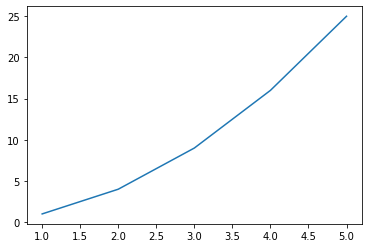

In [81]:
# xとyの値を指定して描画
x = [1, 2, 3, 4, 5]
# y = [1, 4, 9, 16, 25]
y = np.array(x) ** 2
plt.plot(x, y)

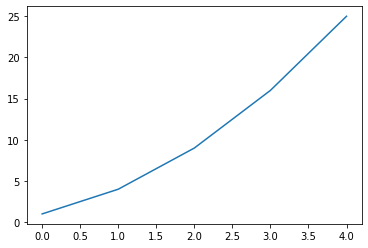

In [9]:
# xを入れない場合yのindexがxになる
plt.plot(y)

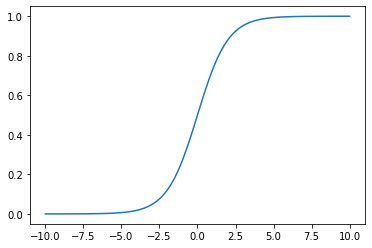

In [19]:
# シグモイド関数のグラフを書いてみる
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'b' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


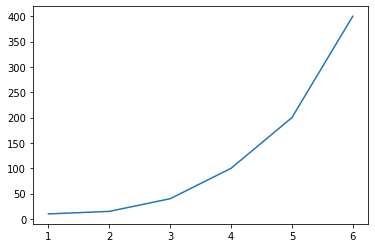

In [82]:
# DataFrameを使う
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                   'b': [10, 15, 40, 100, 200, 400]})
plt.plot('a', 'b', data=df)

## 装飾

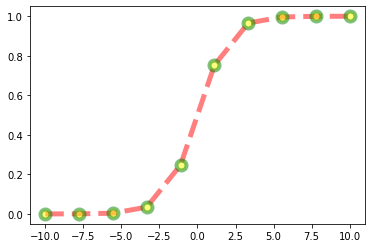

In [84]:
x = np.linspace(-10, 10, 10)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z,
        color='red',    # 色
        linewidth=5,    # 線の太さ。lw＝5でもok
        linestyle='--', # 線のデザイン。　ls=xxでもok
        marker='o',     # マーカー（oやxを指定可能）
        markersize=10,
        markerfacecolor='yellow', # マーカーの中の色
        markeredgecolor='green',  # マーカーの線の色
        markeredgewidth=4,        # マーカーの線の幅
        alpha=0.5       # 透明度
        )

# 付属情報をつける

([<matplotlib.axis.YTick at 0x7f0131211890>,
 <a list of 3 Text yticklabel objects>)

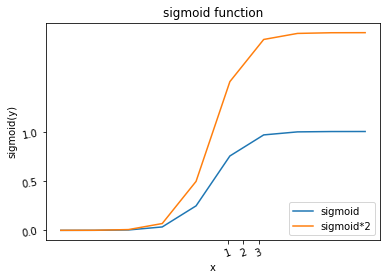

In [89]:
plt.plot(x, z, label='sigmoid')
# 2つのグラフを表示する場合は、もう一つplt.plotを作ればOK
plt.plot(x, 2*z, label='sigmoid*2')
plt.xlabel('x')
plt.ylabel('sigmoid(y)')
plt.title('sigmoid function')
plt.legend(loc='lower right')
plt.xticks([1, 2, 3], rotation=20)
plt.yticks([0, 0.5, 1], rotation=10)

## 映画レビューのデータセットを使って
1. 映画数の年推移
2. revenueの年推移をplotしてみよう

In [72]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [95]:
# まず、年集計に使えそうなrelease_dateからどうやったら年を取れるか考える
release_date_sample = df['release_date'].iloc[0]
release_date_sample
# 文字列で取れる
release_date_sample[:4]

'2009'

In [96]:
# NaNをfilterで消しておく
df = df[~df['release_date'].isna()]

In [98]:
# dfにこの年フォーマットのシリーズを追加する
df['year'] = df['release_date'].apply(lambda x: x[:4])

In [104]:
# year毎のカウントを取得(idの部分はなんでもいい)
x = df.groupby('year').count()['id']

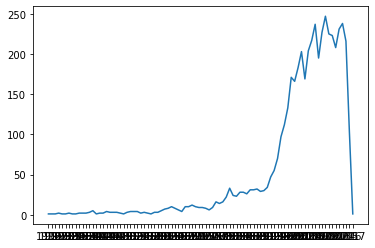

In [105]:
# pltする
plt.plot(x)

Text(0, 0.5, 'count')

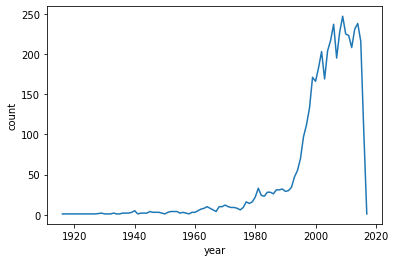

In [111]:
# 年が文字列のため年毎の間隔などを表現できていない
# 文字列を数字に変換するため、lambda関数の戻り値をintでcastする
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))
x = df.groupby('year').count()['id']
plt.plot(x)
plt.xlabel('year')
plt.ylabel('count')

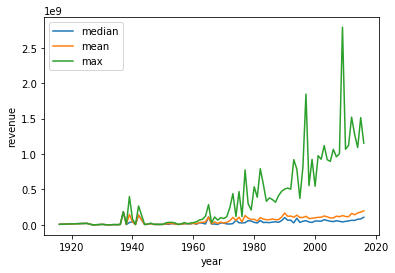

In [124]:
# revenueの推移
# すでに横軸はあるので縦軸を作るだけだが、revenue0は除く
df = df[df['revenue']!=0]
plt.plot(df.groupby('year').median()['revenue'], label='median')
plt.plot(df.groupby('year').mean()['revenue'], label='mean')
plt.plot(df.groupby('year')['revenue'].max(), label='max')
plt.xlabel('year')
plt.ylabel('revenue')
plt.legend()

## 複数のグラフ（図）を使う
1.plt.subplot() 

2-1.plt.figure() 

3-2.lt.subplots() 

### plt.subplot(nrows, ncols, index)

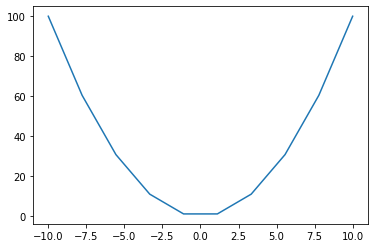

In [5]:
x = np.linspace(-10, 10, 10)
plt.plot(x, x**2)

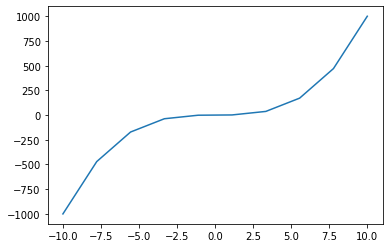

In [6]:
plt.plot(x, x**3)

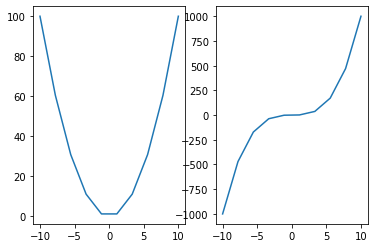

In [7]:
# この二つの図を一緒にする
plt.subplot(1, 2, 1)
plt.plot(x, x**2)
plt.subplot(1, 2, 2)
plt.plot(x, x**3)

### plt.figure()

In [90]:
# figureインスタンスを作り、変数に入れる
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

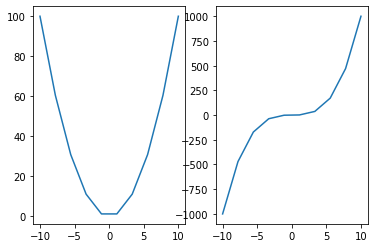

In [92]:
fig = plt.figure()
# axisを追加する
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# plot
ax1.plot(x, x**2)
ax2.plot(x, x**3)

### fig, axes = plt.subplots(nrows=1, ncols=2)

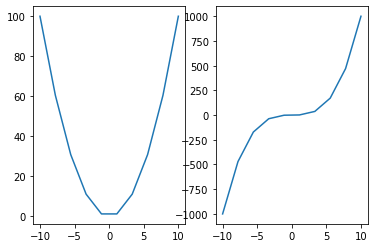

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)
# plot
# axesはnparrayで帰ってきている
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

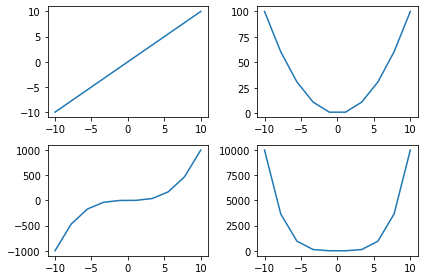

In [93]:
# 多次元
fig, axes = plt.subplots(nrows=2, ncols=2)
# plot
axes[0, 0].plot(x, x**1)
axes[0, 1].plot(x, x**2)
axes[1, 0].plot(x, x**3)
axes[1, 1].plot(x, x**4)
# 軸のラベルが被って見にくい時
fig.tight_layout()

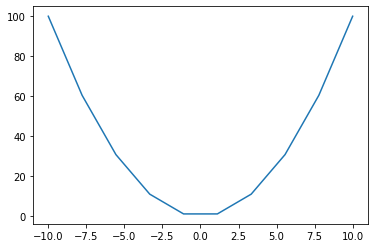

In [13]:
# 1つ（デフォルトで1,1
fig, axes = plt.subplots()
axes.plot(x, x**2)

## 付属情報（axes.set_xx()）

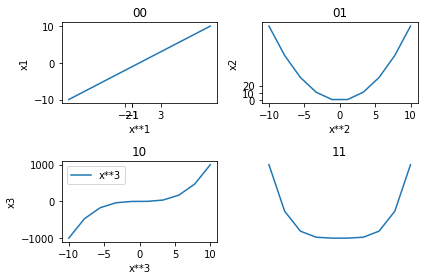

In [94]:
# 複数のaxesに付属情報をつける
fig, axes = plt.subplots(nrows=2, ncols=2)
# plot
axes[0, 0].plot(x, x**1)
axes[0, 1].plot(x, x**2)
axes[1, 0].plot(x, x**3, label='x**3')
axes[1, 1].plot(x, x**4)
axes[0, 0].set_xlabel('x**1')
axes[0, 1].set_xlabel('x**2')
axes[1, 0].set_xlabel('x**3')
axes[1, 1].set_xlabel('x**4')
axes[0, 0].set_ylabel('x1')
axes[0, 1].set_ylabel('x2')
axes[1, 0].set_ylabel('x3')
axes[1, 1].set_ylabel('x4')
axes[0, 0].set_title('00')
axes[0, 1].set_title('01')
axes[1, 0].set_title('10')
axes[1, 1].set_title('11')
axes[0, 0].set_xticks([-1, -2, -1, 3])
axes[0, 1].set_yticks([0, 10, 20])
axes[1, 0].legend()
axes[1, 1].axis('off')
fig.tight_layout()

# Scatter plot: plt.scatter()

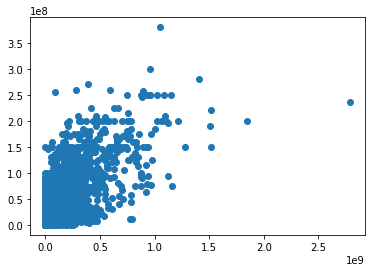

In [95]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.scatter(df['revenue'], df['budget'])

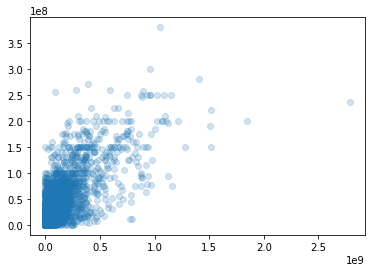

In [74]:
# 点が重なってなんだかわからないのを避けるために透明度を指定する
plt.scatter(df['revenue'], df['budget'], alpha=0.2)

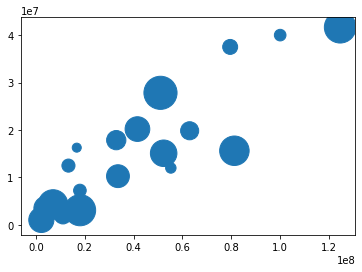

In [42]:
df = df[(df['revenue']!=0) & (df['budget'] !=0)]
lang_group_df = df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]
# vote countをマーカーの大きさにする
plt.scatter('revenue', 'budget', s='vote_count', data=lang_group_df)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


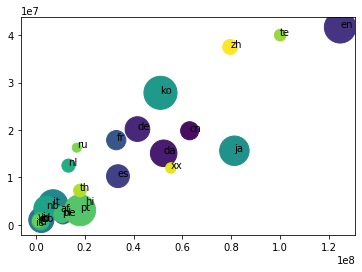

In [55]:
# 色も変えてみる
# 1つ1つに折りを割り振っていくのは現実的ではないので一位の数字を作る
c = np.arange(len(lang_group_df))
print(c)
plt.scatter('revenue', 'budget', s='vote_count',c=c, data=lang_group_df)
# どのデータなのか表示したい
for idx, row in lang_group_df.iterrows():
    plt.annotate(idx, (row['revenue'], row['budget']))

# histogram: plt.hist()

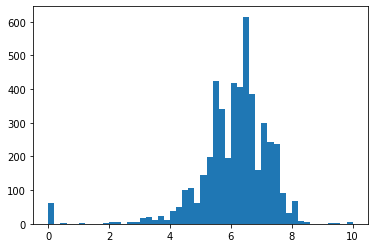

In [18]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.hist(df['vote_average'], bins=50)
# plt histの戻り値が帰ってきて表示されてしまうのが嫌な場合
plt.show()

(array([2.000e+00, 2.600e+01, 6.120e+02, 1.358e+03, 4.850e+02, 2.680e+02,
        1.280e+02, 9.100e+01, 5.800e+01, 3.900e+01, 3.100e+01, 2.700e+01,
        2.000e+01, 1.600e+01, 1.400e+01, 9.000e+00, 9.000e+00, 1.200e+01,
        8.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.65710090e+08, -1.11376586e+08, -5.70430829e+07, -2.70957938e+06,
         5.16239242e+07,  1.05957428e+08,  1.60290931e+08,  2.14624435e+08,
         2.68957938e+08,  3.23291442e+08,  3.77624945e+08,  4.31958449e+08,
         4.86291952e+08,  5.40625456e+08,  5.94958960e+08,  6.49292463e+08,
         7.03625967e+08,  7.57959470e+08,  8.12292974e+08,  8.66626477e+

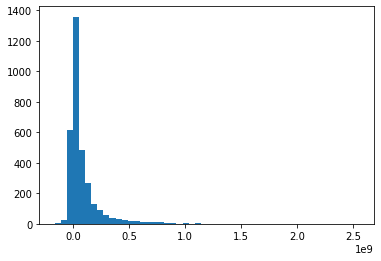

In [24]:
# Let's draw histgram of profit(revenue - budget)
fig, axes = plt.subplots()
# revenueが0をfilterで消しておく
df = df[(df['revenue']!=0) & (df['budget'] !=0)]
df['profit'] = df.apply(lambda row: row['revenue'] - row['budget'], axis=1)
axes.hist(df['profit'], bins=50)

[1.00000000e+00 1.26185688e+00 1.59228279e+00 2.00923300e+00
 2.53536449e+00 3.19926714e+00 4.03701726e+00 5.09413801e+00
 6.42807312e+00 8.11130831e+00 1.02353102e+01 1.29154967e+01
 1.62975083e+01 2.05651231e+01 2.59502421e+01 3.27454916e+01
 4.13201240e+01 5.21400829e+01 6.57933225e+01 8.30217568e+01
 1.04761575e+02 1.32194115e+02 1.66810054e+02 2.10490414e+02
 2.65608778e+02 3.35160265e+02 4.22924287e+02 5.33669923e+02
 6.73415066e+02 8.49753436e+02 1.07226722e+03 1.35304777e+03
 1.70735265e+03 2.15443469e+03 2.71858824e+03 3.43046929e+03
 4.32876128e+03 5.46227722e+03 6.89261210e+03 8.69749003e+03
 1.09749877e+04 1.38488637e+04 1.74752840e+04 2.20513074e+04
 2.78255940e+04 3.51119173e+04 4.43062146e+04 5.59081018e+04
 7.05480231e+04 8.90215085e+04 1.12332403e+05 1.41747416e+05
 1.78864953e+05 2.25701972e+05 2.84803587e+05 3.59381366e+05
 4.53487851e+05 5.72236766e+05 7.22080902e+05 9.11162756e+05
 1.14975700e+06 1.45082878e+06 1.83073828e+06 2.31012970e+06
 2.91505306e+06 3.678379

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   1.,   4.,   1.,   1.,   1.,
          2.,   4.,   8.,   6.,   6.,   6.,   8.,  13.,  16.,   9.,  13.,
         28.,  22.,  31.,  37.,  44.,  47.,  69.,  67.,  77.,  90.,  95.,
        106., 113., 120., 129., 155., 146., 138., 144., 147., 117.,  88.,
         85.,  62.,  50.,  46.,  35.,  27.,  10.,   5.,   2.,   0.,   0.]),
 array([1.00000000e+00, 1.24456395e+00, 1.54893943e+00, 1.92775417e+00,
        2.39921335e+00, 2.98597445e+00, 3.71623615e+00, 4.62509355e+00,
        5.75622470e+00, 7.16398975e+00, 8.91604339e+00, 1.10965862e+01,
        1.38104111e+01, 1.71879398e+01, 2.13914903e+01, 2.66230777e+01,
        3.31341228e+01, 4.12375347e+01, 5.13

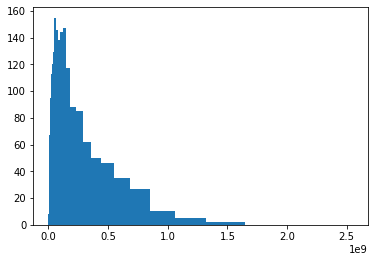

In [28]:
# アバターが2.5bill大きすぎてほとんどが0によってしまう。
fig, axes = plt.subplots()
# logにするといい感じのグラフが作れそう（現在はlinspaceで等間隔）
# log scaleだと、0, 10, 10**2, 10**3
df = df[(df['revenue']!=0) & (df['budget'] !=0)]

# logscaleを思い出す
# これは10の10乗が最大
print(np.logspace(0, 10, 100))

# 今回のprofitのmaxを最大値にしたい
# profitのmaxが10の何乗かわかれば作れる
logbins = np.logspace(0, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)

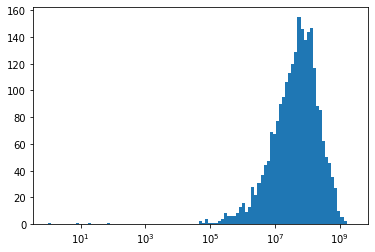

In [29]:
# あまり変わっていないのは、binのくくりはlogで返しているものの表示の仕方は（linspace）
# logのbinを等間隔で表示しなければいけない
fig, axes = plt.subplots()
df = df[(df['revenue']!=0) & (df['budget'] !=0)]
logbins = np.logspace(0, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)
axes.set_xscale('log')

In [30]:
# 小さい値は外れ値と思われるので本当は0ではなくて5とかまで除外しても良い

## 棒グラフ：plt.bar()
ヒストグラムとの違いは、ヒストグラムは連続した値
棒グラフはカテゴリー毎

In [34]:
df = pd.DataFrame({'categorical': ['A', 'B', 'C'], 'val': [10,30,20]})
df

,categorical,val
0,A,10
1,B,30
2,C,20


<BarContainer object of 3 artists>

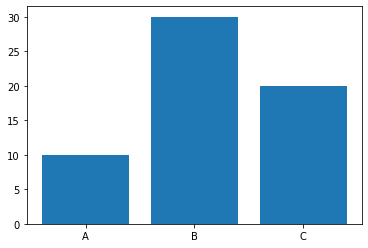

In [35]:
plt.bar('categorical', 'val', data=df)

### DataFrameのbuild-in plot

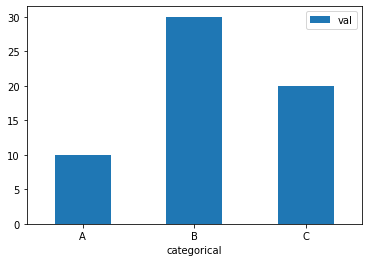

In [37]:
df.plot('categorical', 'val', kind='bar', rot=0)

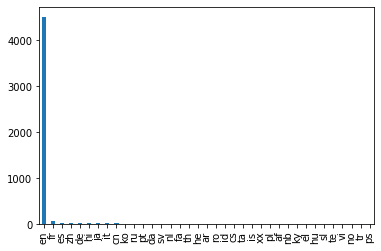

In [43]:
# seriesにplotを指定することもできる
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df['original_language'].value_counts().plot(kind='bar')

## 箱ひげ図：plt.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0130dc77d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0130dc7790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f012fa36b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0130dccd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0130dccc90>],
 'means': []}

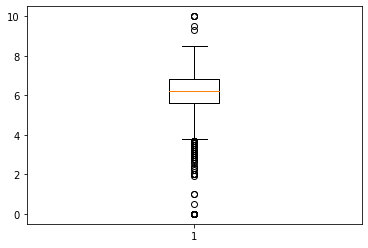

In [45]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.boxplot('vote_average', data=df)

## plotを保存する
- Plot by specifying size
- Save as Png file
- Save as PDF file

### Plot by specifying size:.figure()

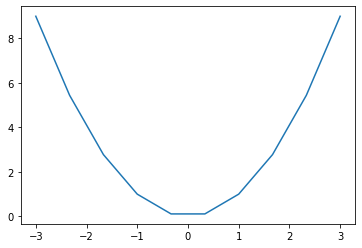

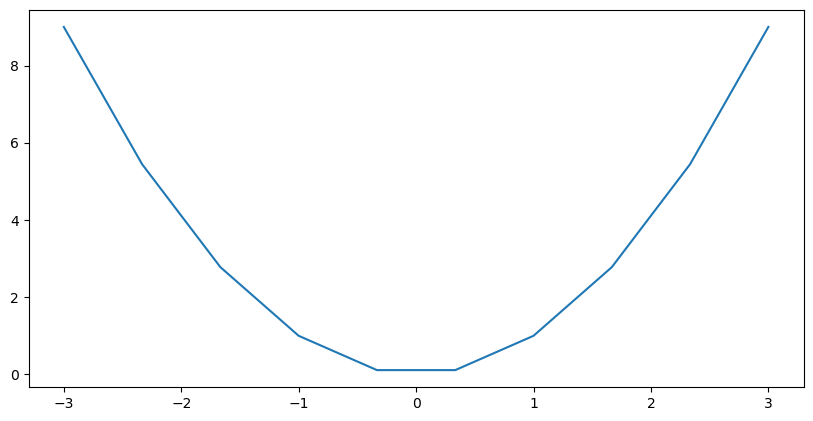

In [51]:
# Plot by specifying size
x = np.linspace(-3, 3, 10)

# このままだといい感じのサイズになる
plt.plot(x, x**2)

# specifying size(aspect ratio(inch) AND 100 dots per inch)
# example x dots = 10*100dots, y dots = 5*100dots
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(x, x**2)

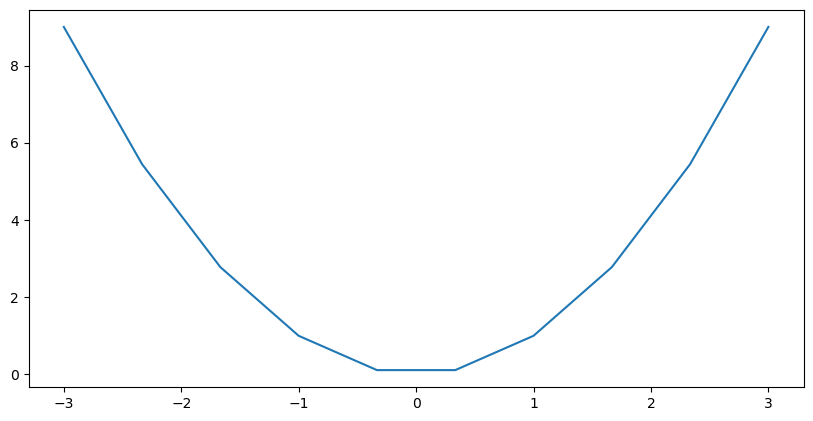

In [53]:
# Object-orientation Method
fig, axes = plt.subplots(figsize=(10, 5), dpi=100)
axes.plot(x, x**2)

### Save as Png file: .savefig()

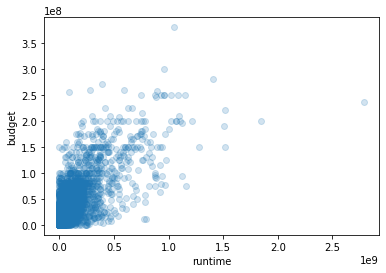

In [58]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.scatter('revenue', 'budget', data=df, alpha=0.2)
# Specify a label when saving
plt.xlabel('runtime')
plt.ylabel('budget')
# Save
plt.savefig('runtime_budget_scatter.png')

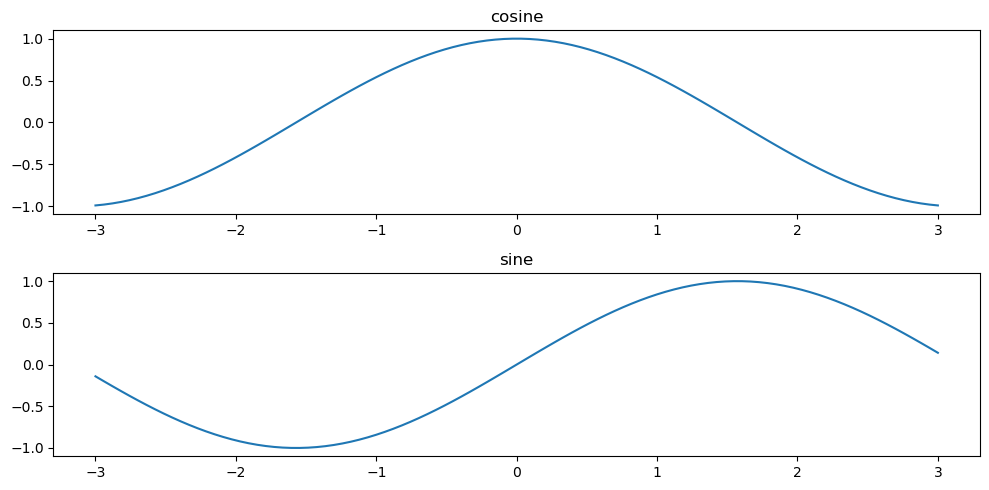

In [69]:
# Object-orientation Method
fig, axes = plt.subplots(2, 1, figsize=(10, 5), dpi=100)

# Try making a plot of sine and cosine
x = np.linspace(-3, 3, 100)
axes[0].set_title('cosine')
axes[0].plot(x, np.cos(x))
axes[1].set_title('sine')
axes[1].plot(x, np.sin(x))
# titleが被ってしまう場合
fig.tight_layout()
# Save
fig.savefig('cos_sin.png')

### Save as PDF file

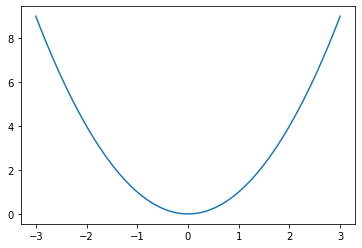

In [75]:
from matplotlib.backends.backend_pdf import PdfPages
# 予めpdfのオブジェクトを作成し、そこに追加していく
pdf = PdfPages('pdf_files.pdf')

fig, axes = plt.subplots()
axes.plot(x, x**2)
pdf.savefig(fig)
# この状態でpdfを開こうとするとエラーになるのでcloseする必要がある
pdf.close()

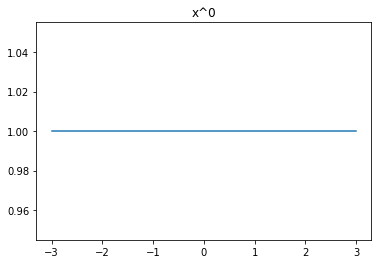

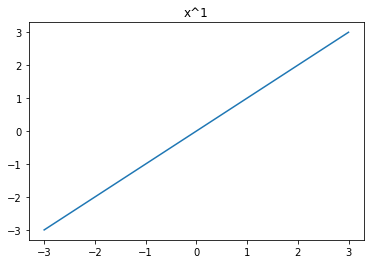

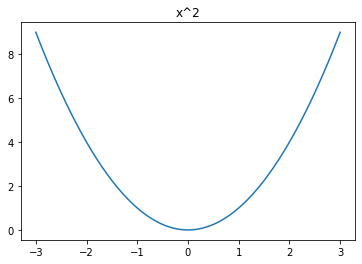

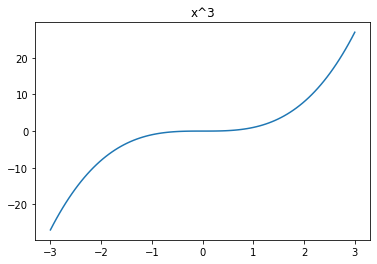

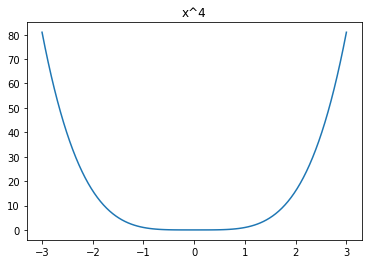

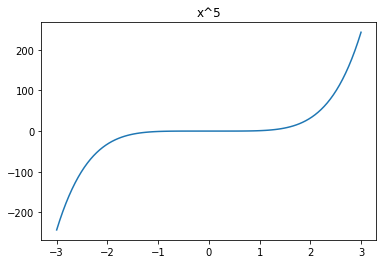

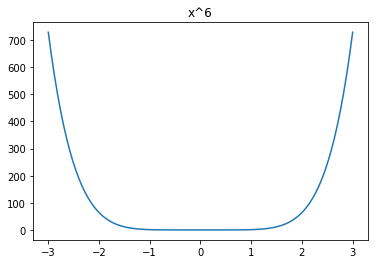

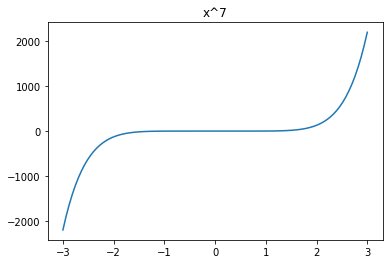

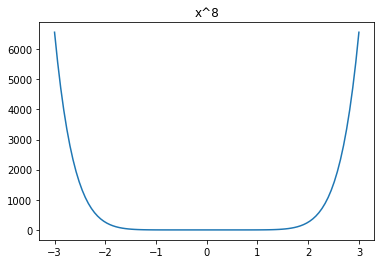

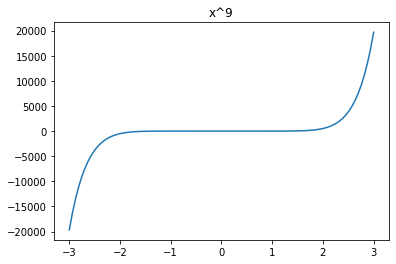

In [79]:
# save multiple plots to pdf
pdf = PdfPages('savemultifig_sample.pdf')
for i in range(10):
    fig, axes = plt.subplots()
    axes.plot(x, x**i)
    axes.set_title('x^{}'.format(i))
    pdf.savefig(fig)
pdf.close()